In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from LLS import LLS
from sklearn.model_selection import train_test_split

In [54]:
data = pd.read_csv("Boston.csv")
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [55]:
data["area"] = data["crim"] * 100 + data["tax"]
data["price"] = data["area"] * 2 + data["age"] * -0.5 + 100 

In [56]:
X = data[["area", "age"]]
Y = data["price"]

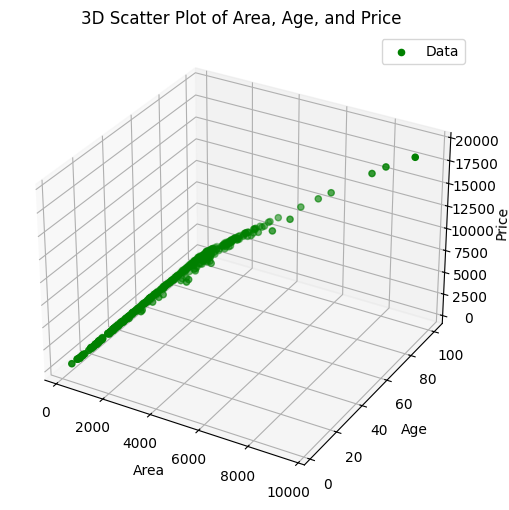

In [57]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["area"], data["age"], data["price"], color="green", label="Data")
ax.set_xlabel("Area")
ax.set_ylabel("Age")
ax.set_zlabel("Price")
plt.title("3D Scatter Plot of Area, Age, and Price")
plt.legend()
plt.show()

In [58]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
lls = LLS()
lls.fit(X_train,Y_train)
y_pred = lls.predict(X_test)

In [60]:
w = lls.w[1]

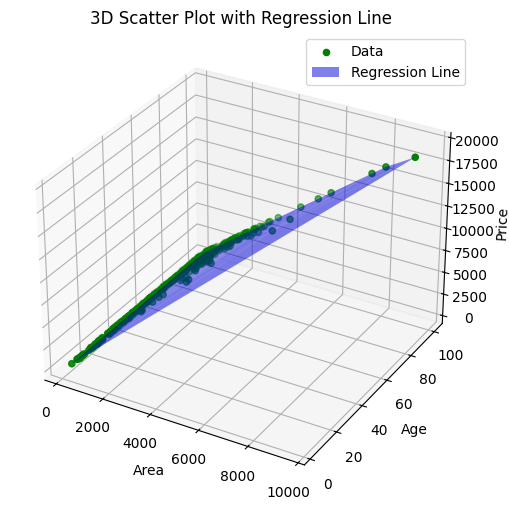

In [67]:
predicted_prices = lls.predict(data[["area", "age"]])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data["area"], data["age"], data["price"], color="green", label="Data")

ax.plot_trisurf(data["area"], data["age"], predicted_prices, color="blue", alpha=0.5, label="Regression Line")

ax.set_xlabel("Area")
ax.set_ylabel("Age")
ax.set_zlabel("Price")
plt.title("3D Scatter Plot with Regression Line")
plt.legend()

plt.show()